Looking for computer science related articles, first in dev, then in train

In [1]:
import json
def show_titles(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        squad_data = json.load(f)
    articles = squad_data['data']
    print(f"Total articles: {len(articles)}")
    print("-" * 30)

    for i, article in enumerate(articles):
        title = article['title']
        num_paragraphs = len(article['paragraphs'])
        print(f"{i+1}. {title} ({num_paragraphs} paragraphs)")

In [2]:
print("Dev file:")
show_titles('../data/stanford-question-answering-dataset/dev-v1.1.json')

Dev file:
Total articles: 48
------------------------------
1. Super_Bowl_50 (54 paragraphs)
2. Warsaw (49 paragraphs)
3. Normans (45 paragraphs)
4. Nikola_Tesla (92 paragraphs)
5. Computational_complexity_theory (48 paragraphs)
6. Teacher (58 paragraphs)
7. Martin_Luther (98 paragraphs)
8. Southern_California (39 paragraphs)
9. Sky_(United_Kingdom) (22 paragraphs)
10. Victoria_(Australia) (25 paragraphs)
11. Huguenot (44 paragraphs)
12. Steam_engine (46 paragraphs)
13. Oxygen (43 paragraphs)
14. 1973_oil_crisis (24 paragraphs)
15. Apollo_program (57 paragraphs)
16. European_Union_law (41 paragraphs)
17. Amazon_rainforest (21 paragraphs)
18. Ctenophora (31 paragraphs)
19. Fresno,_California (28 paragraphs)
20. Packet_switching (23 paragraphs)
21. Black_Death (23 paragraphs)
22. Geology (25 paragraphs)
23. Newcastle_upon_Tyne (53 paragraphs)
24. Victoria_and_Albert_Museum (59 paragraphs)
25. American_Broadcasting_Company (98 paragraphs)
26. Genghis_Khan (54 paragraphs)
27. Pharmacy (26 

In [3]:
print("Train file:")
show_titles('../data/stanford-question-answering-dataset/train-v1.1.json')

Train file:
Total articles: 442
------------------------------
1. University_of_Notre_Dame (55 paragraphs)
2. Beyoncé (66 paragraphs)
3. Montana (44 paragraphs)
4. Genocide (26 paragraphs)
5. Antibiotics (26 paragraphs)
6. Frédéric_Chopin (82 paragraphs)
7. Sino-Tibetan_relations_during_the_Ming_dynasty (72 paragraphs)
8. IPod (60 paragraphs)
9. The_Legend_of_Zelda:_Twilight_Princess (32 paragraphs)
10. Spectre_(2015_film) (43 paragraphs)
11. 2008_Sichuan_earthquake (77 paragraphs)
12. New_York_City (148 paragraphs)
13. To_Kill_a_Mockingbird (62 paragraphs)
14. Solar_energy (52 paragraphs)
15. Tajikistan (32 paragraphs)
16. Anthropology (45 paragraphs)
17. Portugal (98 paragraphs)
18. Kanye_West (79 paragraphs)
19. Buddhism (149 paragraphs)
20. American_Idol (127 paragraphs)
21. Dog (75 paragraphs)
22. 2008_Summer_Olympics_torch_relay (74 paragraphs)
23. Alfred_North_Whitehead (47 paragraphs)
24. Financial_crisis_of_2007%E2%80%9308 (79 paragraphs)
25. Saint_Barth%C3%A9lemy (24 paragrap

Choosing to use articles numbered 4 and 19 from dev, and 31, 63, 105, 125, 150, 158, 178, 230, 294, 296, 331, 334, 390, 394 from train

In [4]:
wanted = {}

with open('../data/stanford-question-answering-dataset/dev-v1.1.json', 'r', encoding='utf-8') as f:
    squad_data = json.load(f)
all = squad_data['data']
for i, article in enumerate(all):
    if i==4 or i==19 :
        wanted[article['title']] = article['paragraphs']

with open('../data/stanford-question-answering-dataset/train-v1.1.json', 'r', encoding='utf-8') as f:
    squad_data = json.load(f)
all = squad_data['data']
for i, article in enumerate(all):
    if i in {30, 62, 104, 124, 149, 157, 177, 229, 293, 295, 330, 333, 389, 393} :
        wanted[article['title']] = article['paragraphs']

In [5]:
import pandas as pd
from collections import defaultdict
article_dict = {}
context_dict = defaultdict(str)
rows = []
article_id=0
context_id=0
for title, contexts in wanted.items():
    article_dict[article_id] = title
    for i, element in enumerate(contexts):
        # for getting paragraphs alone
        # context_dict[context_id]=element.get('context')
        # for getting whole article text
        context_dict[article_id]+=element.get('context')
        qas = element.get('qas', [])
        for qa in qas:
            row = {
                'article_id': article_id,
                'context_id': context_id,
                'question_id': qa.get('id'),
                'question': qa.get('question'),
                'answers(list of dict)': qa.get('answers') # leave this for later i guess
            }
            rows.append(row)
        context_id+=1
    article_id+=1

result_df = pd.DataFrame(rows)

In [6]:
display(result_df)

,article_id,context_id,question_id,question,answers(list of dict)
0,0,0,56e16182e3433e1400422e28,What branch of theoretical computer science de...,"[{'answer_start': 0, 'text': 'Computational co..."
1,0,0,56e16182e3433e1400422e29,By what main attribute are computational probl...,"[{'answer_start': 175, 'text': 'inherent diffi..."
2,0,0,56e16182e3433e1400422e2a,What is the term for a task that generally len...,"[{'answer_start': 133, 'text': 'computational ..."
3,0,1,56e16839cd28a01900c67887,What measure of a computational problem broadl...,"[{'answer_start': 46, 'text': 'if its solution..."
4,0,1,56e16839cd28a01900c67888,What method is used to intuitively assess or q...,"[{'answer_start': 176, 'text': 'mathematical m..."
...,...,...,...,...,...
2260,15,579,57302364b2c2fd1400568927,What type of construction was originally used ...,"[{'answer_start': 240, 'text': 'through-hole'}]"
2261,15,579,57302364b2c2fd1400568928,In what year was the Auto-Sembly process created?,"[{'answer_start': 270, 'text': '1949'}]"
2262,15,579,57302364b2c2fd140056892a,What year was the patent for the Auto-Sembly p...,"[{'answer_start': 514, 'text': '1956'}]"
2263,15,579,57302364b2c2fd1400568929,Although two men developed the Auto-Sembly pro...,"[{'answer_start': 539, 'text': 'U.S. Army'}]"


In [7]:
article_dict

{0: 'Computational_complexity_theory',
 1: 'Packet_switching',
 2: 'Wayback_Machine',
 3: 'Web_browser',
 4: 'Computer',
 5: 'Computer_security',
 6: 'ASCII',
 7: 'Macintosh',
 8: 'Memory',
 9: 'Data_compression',
 10: 'USB',
 11: 'Unicode',
 12: 'IBM',
 13: 'Software_testing',
 14: 'Database',
 15: 'Printed_circuit_board'}

In [8]:
context_dict

defaultdict(str,
            {0: 'Computational complexity theory is a branch of the theory of computation in theoretical computer science that focuses on classifying computational problems according to their inherent difficulty, and relating those classes to each other. A computational problem is understood to be a task that is in principle amenable to being solved by a computer, which is equivalent to stating that the problem may be solved by mechanical application of mathematical steps, such as an algorithm.A problem is regarded as inherently difficult if its solution requires significant resources, whatever the algorithm used. The theory formalizes this intuition, by introducing mathematical models of computation to study these problems and quantifying the amount of resources needed to solve them, such as time and storage. Other complexity measures are also used, such as the amount of communication (used in communication complexity), the number of gates in a circuit (used in circui

In [9]:
result_df.iloc[0].get('answers(list of dict)')

[{'answer_start': 0, 'text': 'Computational complexity theory'},
 {'answer_start': 0, 'text': 'Computational complexity theory'},
 {'answer_start': 0, 'text': 'Computational complexity theory'}]

In [10]:
contexts_df = pd.DataFrame(context_dict.items(), columns=["id","text"])

In [11]:
contexts_df['Length'] = contexts_df["text"].str.len()

In [12]:
display(contexts_df.describe())

,id,Length
count,16.000000,16.000000
mean,7.500000,24985.875000
std,4.760952,10647.514902
min,0.000000,10001.000000
25%,3.750000,18655.750000
50%,7.500000,22280.000000
75%,11.250000,27949.500000
max,15.000000,47293.000000


<Axes: xlabel='Length', ylabel='Density'>

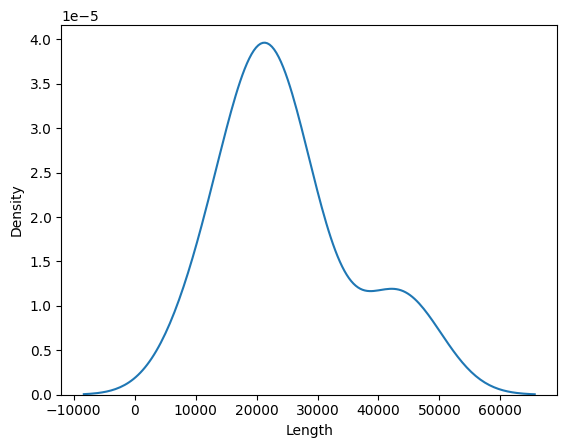

In [13]:
import seaborn as sb
sb.kdeplot(contexts_df["Length"])

In [17]:
for x in result_df.sample(50)['question'] :
    print(x)

Can we control what is stored in our sensory memory?
what is another name for a high-surrogate code point? 
What are commonly used techniques during dynamic testing?
What was the Macintosh II's new modular design similar to?
How many iMac units sold in the first 139 days?
What does not qualify as grey-box testing?
What is used to recover data if disks suffer a failure?
Why was dBASE unique?
What are the three primary expressions used to represent case complexity?
What programming language uses UTF-32 as internal representation of characters? 
Where was the Antikythera mechanism found in 1901?
If polynomial time can be utilized within an NP-complete problem, what does the imply P is equal to?
If changes need to occur during the softwares early release with regression testing how much of an impact does this have on the team as related to other testing? 
What is an important advantage of USB?
What as a drawback of previous connectors?
What is it called when a public test continues indefin